In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from scipy.stats import pearsonr, spearmanr
import h3pandas
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pickle
from warnings import filterwarnings
import matplotlib.colors as colors
import geopandas as gpd 
import sys
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import matplotlib

from plotting_utils import get_color_dict
color_dict = get_color_dict()

filterwarnings('ignore')
tqdm.pandas()

plt.rcParams.update({'font.family':'arial'})



## tmin

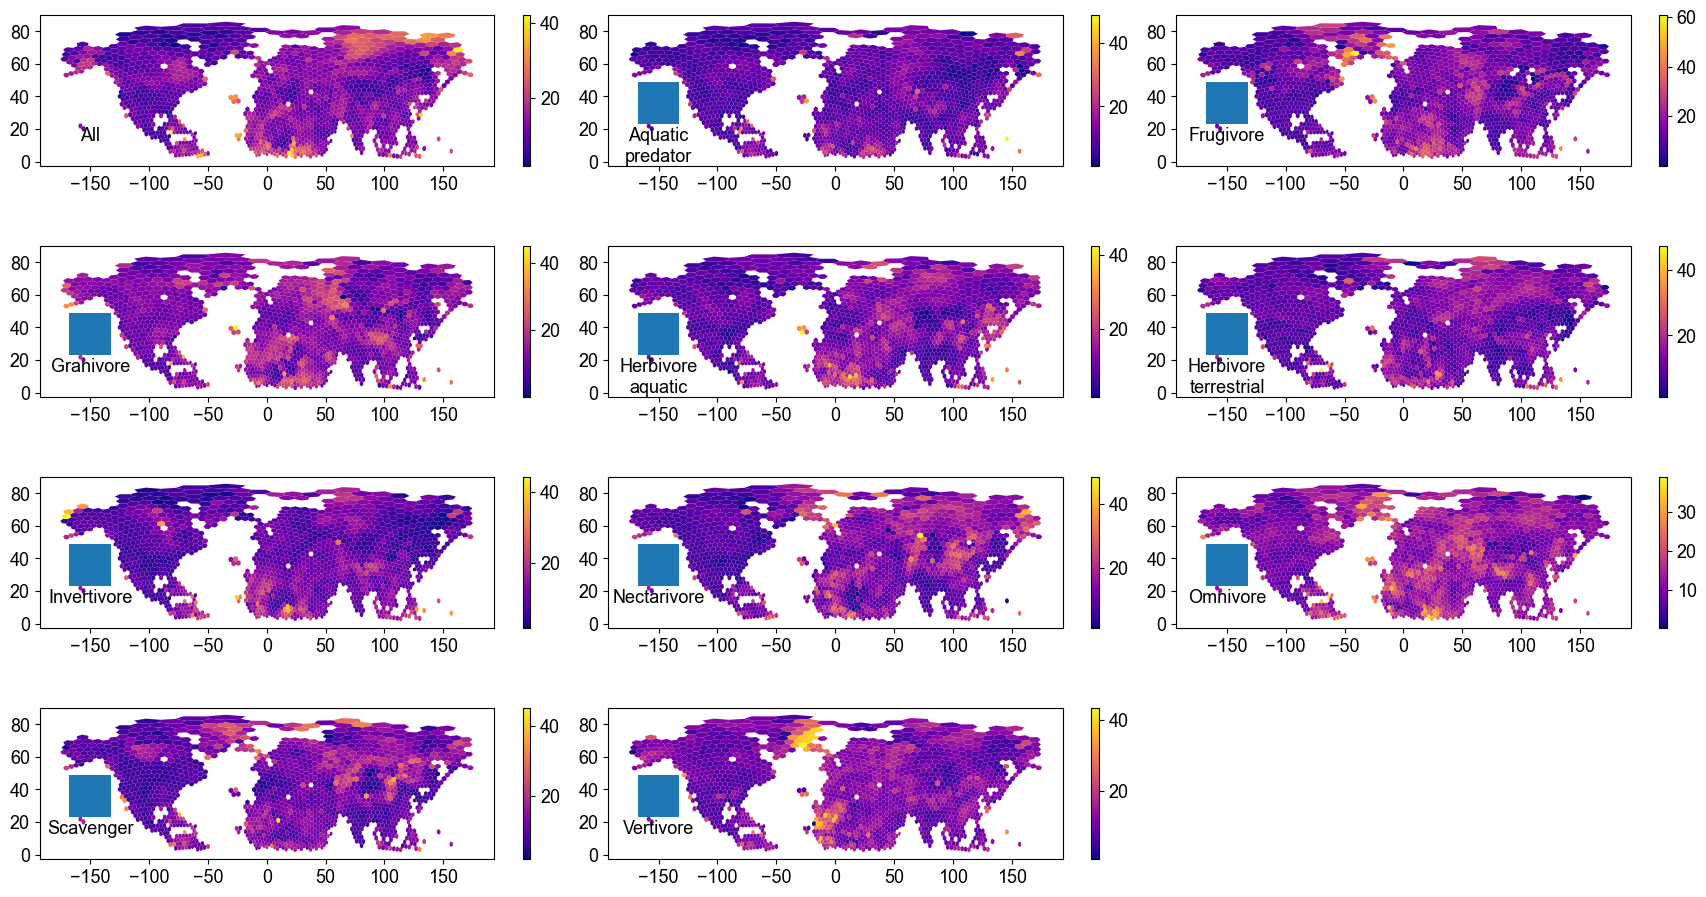

In [26]:
cue_name = 'tmin'

fig,axs = plt.subplots(4,3,figsize=((11/2) * 4, (8/2)*3))
for niche_count, niche in enumerate(color_dict.keys()):
    
    ax = axs[niche_count // 3, niche_count % 3]
    
    data = pd.read_csv(f'../../data/D07.BYM2_summary/modeling_data_with_posterior_est_niche_{niche}_env_{cue_name}.csv')
    data = data = data.groupby(['h3_02'])[[f'mean_expected_trace_by_{cue_name}']].std().h3.h3_to_geo_boundary().reset_index(drop=False)
    data.plot(f'mean_expected_trace_by_{cue_name}', ax = ax,legend=False, cmap='plasma')
    
    vmin, vmax = data[f'mean_expected_trace_by_{cue_name}'].min(), data[f'mean_expected_trace_by_{cue_name}'].max()

    norm = matplotlib.colors.Normalize(vmin=max(vmin, 0), vmax=vmax)

    cbar = plt.cm.ScalarMappable(norm=norm, cmap='plasma')
    cb = plt.colorbar(cbar, ax=ax, shrink=0.65)
    # cb.set_label(label="Sensitivity to temperature", fontsize=15)

    cb.set_ticks([i for i in cb.get_ticks() if not (i > vmax or i < vmin)])
    cb.set_ticklabels(["{:.0f}".format(float(i)) for i in cb.get_ticks()], fontsize=13)

    # add annotation
    import skunk
    from matplotlib.offsetbox import AnnotationBbox
    size=(30,30)
    
    if not niche == 'all':
        box = skunk.Box(size[0], size[1], niche)
        ab = AnnotationBbox(box, (-150,36),
                    xycoords='data',
                    boxcoords='data',
                    frameon=False)
        ax.add_artist(ab)
        
    ax.annotate(niche.split('Trophic_Niche_')[-1].replace('_',' ').capitalize().replace(' ','\n'),
            xy=(-150,21),  # Position to place the annotation text
            fontsize=13,
            ha='center',va='top')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=13)
    
# plt.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0)
axs[3, 2].remove()

svg = skunk.insert({niche:f"../../silhouette/SVG/{niche}.svg" for niche in color_dict.keys() if not niche == 'all'})

import cairosvg
cairosvg.svg2pdf(bytestring=svg, write_to=f'Cue_interannual_variability_{cue_name}.pdf')

# plt.tight_layout()
# fig.subplots_adjust(wspace=0, hspace=0) #left=0.1, right=0.9, top=0.9, bottom=0.1, 



## delta_NDVI

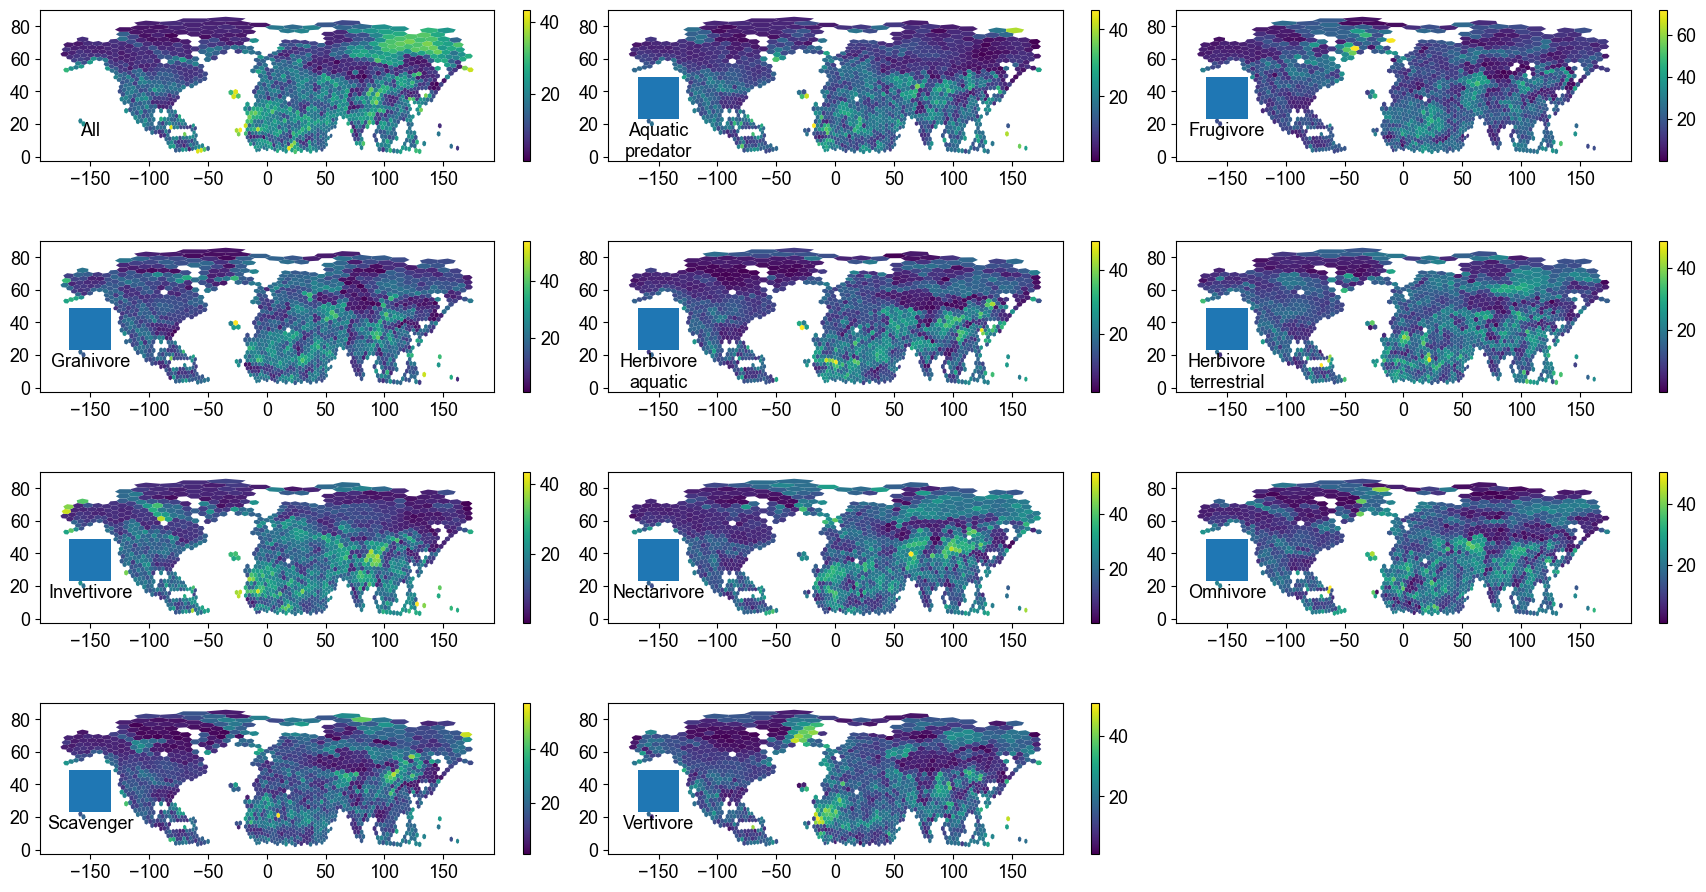

In [25]:
cue_name = 'delta_NDVI'

fig,axs = plt.subplots(4,3,figsize=((11/2) * 4, (8/2)*3))
for niche_count, niche in enumerate(color_dict.keys()):
    
    ax = axs[niche_count // 3, niche_count % 3]
    
    data = pd.read_csv(f'../../data/D07.BYM2_summary/modeling_data_with_posterior_est_niche_{niche}_env_{cue_name}.csv')
    data = data = data.groupby(['h3_02'])[[f'mean_expected_trace_by_{cue_name}']].std().h3.h3_to_geo_boundary().reset_index(drop=False)
    data.plot(f'mean_expected_trace_by_{cue_name}', ax = ax,legend=False)
    
    vmin, vmax = data[f'mean_expected_trace_by_{cue_name}'].min(), data[f'mean_expected_trace_by_{cue_name}'].max()

    norm = matplotlib.colors.Normalize(vmin=max(vmin, 0), vmax=vmax)

    cbar = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
    cb = plt.colorbar(cbar, ax=ax, shrink=0.65)
    # cb.set_label(label="Sensitivity to temperature", fontsize=15)

    cb.set_ticks([i for i in cb.get_ticks() if not (i > vmax or i < vmin)])
    cb.set_ticklabels(["{:.0f}".format(float(i)) for i in cb.get_ticks()], fontsize=13)

    # add annotation
    import skunk
    from matplotlib.offsetbox import AnnotationBbox
    size=(30,30)
    
    if not niche == 'all':
        box = skunk.Box(size[0], size[1], niche)
        ab = AnnotationBbox(box, (-150,36),
                    xycoords='data',
                    boxcoords='data',
                    frameon=False)
        ax.add_artist(ab)
        
    ax.annotate(niche.split('Trophic_Niche_')[-1].replace('_',' ').capitalize().replace(' ','\n'),
            xy=(-150,21),  # Position to place the annotation text
            fontsize=13,
            ha='center',va='top')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=13)
    
# plt.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0)
axs[3, 2].remove()

svg = skunk.insert({niche:f"../../silhouette/SVG/{niche}.svg" for niche in color_dict.keys() if not niche == 'all'})

import cairosvg
cairosvg.svg2pdf(bytestring=svg, write_to=f'Cue_interannual_variability_{cue_name}.pdf')

# plt.tight_layout()
# fig.subplots_adjust(wspace=0, hspace=0) #left=0.1, right=0.9, top=0.9, bottom=0.1, 



In [6]:
data.columns

Index(['h3_02', 'mean_DOY_max', 'std_DOY_max', 'mean_DOY_peak', 'std_DOY_peak',
       'lng', 'lat', 'source_model', 'season', 'year', 'niche_or_level',
       'mean_seasonality', 'cell_index', 'year_index', 'mu_ARR', 'std_ARR',
       'mean_expected_trace_by_mean_NDVI', 'std_expected_trace_by_mean_NDVI',
       'mean_expected_trace_by_delta_NDVI', 'std_expected_trace_by_delta_NDVI',
       'mean_expected_trace_by_tmean', 'std_expected_trace_by_tmean',
       'mean_expected_trace_by_tmax', 'std_expected_trace_by_tmax',
       'mean_expected_trace_by_tmin', 'std_expected_trace_by_tmin', 'geometry',
       'centered_mu_ARR', 'centered_mean_expected_trace_by_tmin',
       'env_date_mean', 'env_date_std', 'arrival_true_mean',
       'arrival_true_std'],
      dtype='object')

In [5]:
data

,h3_02,mean_DOY_max,std_DOY_max,mean_DOY_peak,std_DOY_peak,lng,lat,source_model,season,year,...,std_expected_trace_by_tmax,mean_expected_trace_by_tmin,std_expected_trace_by_tmin,geometry,centered_mu_ARR,centered_mean_expected_trace_by_tmin,env_date_mean,env_date_std,arrival_true_mean,arrival_true_std
0,820007fffffffff,17.000000,2.828427,112.000000,7.071068,38.027955,79.251775,10_100_30_80,spring,2016,...,1.712932,83.388889,2.113895,"POLYGON ((36.42872092351117 77.68574902454715,...",19.687735,14.353854,14.604800,2.110630,11.227079,2.613713
1,820007fffffffff,181.000000,2.828427,60.500000,7.778175,38.027955,79.251775,10_100_30_80,spring,2017,...,7.305099,55.531250,17.860249,"POLYGON ((36.42872092351117 77.68574902454715,...",-18.209363,-13.503785,-22.470984,12.171419,-13.626880,8.106517
2,820007fffffffff,82.000000,4.242641,82.500000,3.535534,38.027955,79.251775,10_100_30_80,spring,2019,...,5.963958,58.840000,11.851540,"POLYGON ((36.42872092351117 77.68574902454715,...",-6.499169,-10.195035,-11.273930,6.588078,-6.083673,4.176730
3,820007fffffffff,94.500000,0.707107,94.500000,0.707107,38.027955,79.251775,10_100_30_80,spring,2020,...,9.095699,78.380000,16.777679,"POLYGON ((36.42872092351117 77.68574902454715,...",5.020798,9.344965,5.805274,2.266806,5.048896,1.016019
4,82001ffffffffff,93.592593,19.069225,95.074074,14.293425,50.523675,81.038483,10_100_30_80,spring,2016,...,2.008130,77.230769,3.197488,"POLYGON ((46.680722653744276 79.5227562387261,...",0.637175,-5.009324,-4.978466,3.146717,-1.500449,2.020273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12211,8282d7fffffffff,135.944444,50.145051,81.722222,5.062033,9.187838,3.530667,10_40_20_50,spring,2019,...,5.271190,54.632653,7.666217,POLYGON ((10.026444557704739 2.318989904044636...,2.092105,1.692655,1.164143,5.246592,2.449023,5.041810
12212,8282d7fffffffff,47.315068,3.926486,47.315068,3.926486,9.187838,3.530667,10_40_20_50,spring,2020,...,9.981899,20.406250,4.910950,POLYGON ((10.026444557704739 2.318989904044636...,-31.648340,-32.533748,-33.000633,4.123444,-30.625453,4.523005
12213,8282dffffffffff,104.803371,39.155645,83.864407,6.941618,6.787301,4.465236,10_40_20_50,spring,2018,...,3.241760,64.402299,14.755732,"POLYGON ((7.656464521877464 3.293008662639565,...",15.278827,21.501325,16.923362,8.452116,17.031571,7.596456
12214,8282dffffffffff,147.976190,40.193090,92.097403,28.722419,6.787301,4.465236,10_40_20_50,spring,2019,...,4.657901,46.279570,5.456081,"POLYGON ((7.656464521877464 3.293008662639565,...",6.132069,3.378596,3.477340,5.431112,4.627206,5.218495


In [3]:
data

,h3_02,mean_DOY_max,std_DOY_max,mean_DOY_peak,std_DOY_peak,lng,lat,source_model,season,year,...,std_expected_trace_by_tmax,mean_expected_trace_by_tmin,std_expected_trace_by_tmin,geometry,centered_mu_ARR,centered_mean_expected_trace_by_tmin,env_date_mean,env_date_std,arrival_true_mean,arrival_true_std
0,820007fffffffff,17.000000,2.828427,112.000000,7.071068,38.027955,79.251775,10_100_30_80,spring,2016,...,1.712932,83.388889,2.113895,"POLYGON ((36.42872092351117 77.68574902454715,...",19.687735,14.353854,14.604800,2.110630,11.227079,2.613713
1,820007fffffffff,181.000000,2.828427,60.500000,7.778175,38.027955,79.251775,10_100_30_80,spring,2017,...,7.305099,55.531250,17.860249,"POLYGON ((36.42872092351117 77.68574902454715,...",-18.209363,-13.503785,-22.470984,12.171419,-13.626880,8.106517
2,820007fffffffff,82.000000,4.242641,82.500000,3.535534,38.027955,79.251775,10_100_30_80,spring,2019,...,5.963958,58.840000,11.851540,"POLYGON ((36.42872092351117 77.68574902454715,...",-6.499169,-10.195035,-11.273930,6.588078,-6.083673,4.176730
3,820007fffffffff,94.500000,0.707107,94.500000,0.707107,38.027955,79.251775,10_100_30_80,spring,2020,...,9.095699,78.380000,16.777679,"POLYGON ((36.42872092351117 77.68574902454715,...",5.020798,9.344965,5.805274,2.266806,5.048896,1.016019
4,82001ffffffffff,93.592593,19.069225,95.074074,14.293425,50.523675,81.038483,10_100_30_80,spring,2016,...,2.008130,77.230769,3.197488,"POLYGON ((46.680722653744276 79.5227562387261,...",0.637175,-5.009324,-4.978466,3.146717,-1.500449,2.020273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12211,8282d7fffffffff,135.944444,50.145051,81.722222,5.062033,9.187838,3.530667,10_40_20_50,spring,2019,...,5.271190,54.632653,7.666217,POLYGON ((10.026444557704739 2.318989904044636...,2.092105,1.692655,1.164143,5.246592,2.449023,5.041810
12212,8282d7fffffffff,47.315068,3.926486,47.315068,3.926486,9.187838,3.530667,10_40_20_50,spring,2020,...,9.981899,20.406250,4.910950,POLYGON ((10.026444557704739 2.318989904044636...,-31.648340,-32.533748,-33.000633,4.123444,-30.625453,4.523005
12213,8282dffffffffff,104.803371,39.155645,83.864407,6.941618,6.787301,4.465236,10_40_20_50,spring,2018,...,3.241760,64.402299,14.755732,"POLYGON ((7.656464521877464 3.293008662639565,...",15.278827,21.501325,16.923362,8.452116,17.031571,7.596456
12214,8282dffffffffff,147.976190,40.193090,92.097403,28.722419,6.787301,4.465236,10_40_20_50,spring,2019,...,4.657901,46.279570,5.456081,"POLYGON ((7.656464521877464 3.293008662639565,...",6.132069,3.378596,3.477340,5.431112,4.627206,5.218495
